In [1]:
setwd('../../')
source('.Rprofile')
setwd('./benchmark/analysis')

library(ggplot2)
library(tidyverse)
library(ggpubr)
library(patchwork)

[1] "/rd2/user/xiacr/SLAT/renv/library/R-4.1/x86_64-pc-linux-gnu"         
[2] "/rd2/user/xiacr/SLAT/renv/sandbox/R-4.1/x86_64-pc-linux-gnu/a77553de"


Warning message in system2("poetry", c("env", "info", "--path"), stdout = TRUE):
“running command ''poetry' env info --path' had status 1”


python:         /rd2/user/xiacr/SLAT/conda/bin/python
libpython:      /rd2/user/xiacr/SLAT/conda/lib/libpython3.8.so
pythonhome:     /rd2/user/xiacr/SLAT/conda:/rd2/user/xiacr/SLAT/conda
version:        3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:18)  [GCC 10.3.0]
numpy:          /rd2/user/xiacr/SLAT/conda/lib/python3.8/site-packages/numpy
numpy_version:  1.23.3

NOTE: Python version was forced by use_python function
[1] "/rd2/user/xiacr/SLAT/conda/lib:/rd2/user/xiacr/SLAT/resource/R/lib/R/lib:/usr/local/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-11-openjdk-amd64/lib/server"


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data <- read_csv('../results/benchmark_hetero.csv')
data <- data %>% mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data$method <- factor(data$method, levels = c('SLAT', 'PASTE', 'STAGATE', 'Harmony', 'Seurat'))
data

Rows: 5 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): dataset, method
dbl (14): cells, seed, celltype_macro_f1, celltype_micro_f1, celltype_score,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_macro_f1,celltype_micro_f1,celltype_score,edge_score,euclidean_dis,global_score,region_macro_f1,region_micro_f1,region_score,run_time,total_macro_f1,total_micro_f1
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stereo_seqfish_embryo_9.5,0,0,Harmony,0.8255515,0.8362155,0.8362155,-40.41026,0.27524038,0.6557344,0.5513545,0.7511429,0.7511429,10.80082,0.32042412,0.6557344
stereo_seqfish_embryo_9.5,0,0,PASTE,0.2391488,0.3802425,0.3802425,-832.27748,0.36839280,0.3357185,0.3255023,0.5404492,0.5404492,76.71435,0.07199999,0.3357185
stereo_seqfish_embryo_9.5,0,0,SLAT,0.8342493,0.8427748,0.8427748,-36.63129,0.09867704,0.7312661,0.6292179,0.8541046,0.8541046,13.24061,0.40986978,0.7312661
stereo_seqfish_embryo_9.5,0,0,STAGATE,0.5786854,0.5976943,0.5976943,-128.61220,0.31051311,0.4742596,0.4801852,0.6569271,0.6569271,63.78149,0.19864817,0.4742596
stereo_seqfish_embryo_9.5,0,0,Seurat,0.8617170,0.8652355,0.8652355,-52.66031,0.23977797,0.6942954,0.5771358,0.7809581,0.7809581,194.75000,0.34277307,0.6942954


Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”


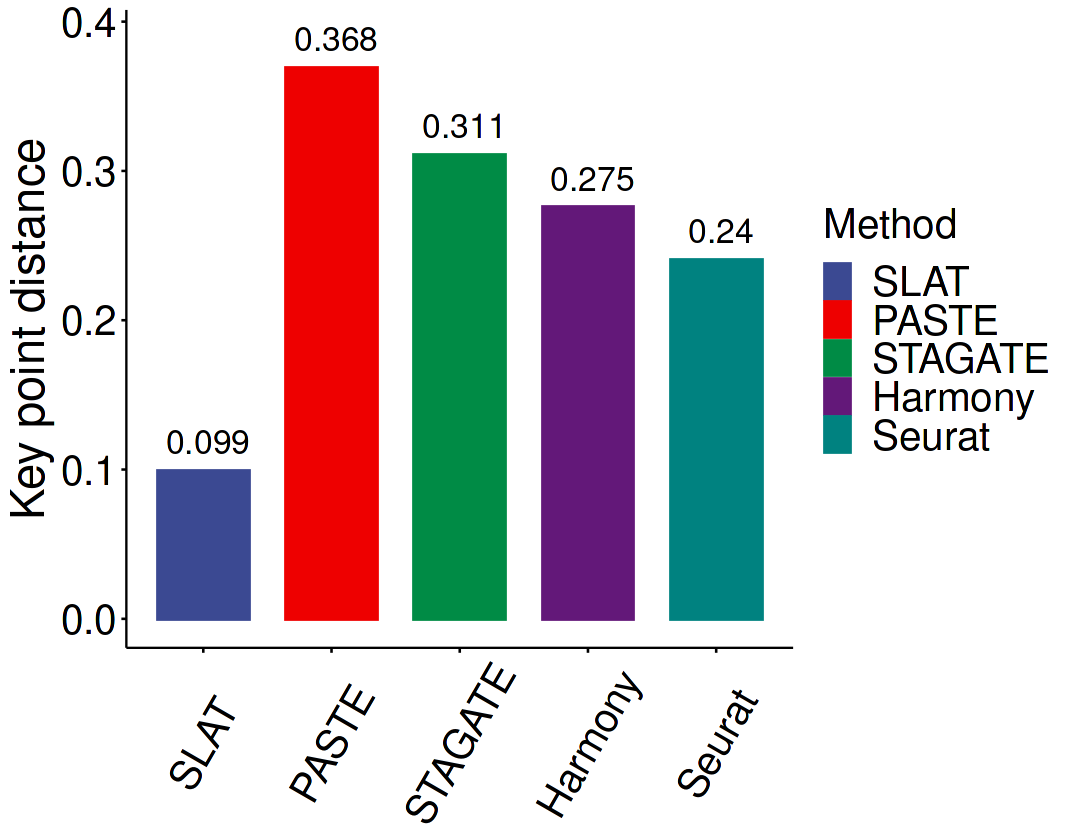

In [3]:
options(repr.plot.width=9, repr.plot.height=7)
ggbarplot(data, x="method", y="euclidean_dis", fill='method', color='method',
        add="mean_se", error.plot="upper_errorbar",
        palette='aaas', xlab=F , ylab='Key point distance', size=1, lab.size=5, label.pos="out",
        legend.title='Method') %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28) +
stat_summary(fun.data = function(x) data.frame(y = mean(x) + 0.02, label = paste("", round(mean(x), 3))), geom="text", size=7) +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))